In [1]:
# Simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
sim = pd.read_csv('results/simulation_five_variate_20230321.csv')
# Number of count exactly 499
rho_list = np.array([0,0.3,0.7])
SNR_list = np.array([6.0, 3.52, 2.07, 1.22, 0.71])
summary_count = []
for rho in rho_list:
    for snr in SNR_list:
        counter = 0
        df = sim[(sim.rho==rho)&(sim.SNR==snr)]
        for i, row in df.iterrows():
            if 499 in [int(item) for item in re.findall(r'\d+', row['Change Points'])]:
                counter = counter + 1
        summary_count.append([rho, snr, counter, counter/500])
summary_count

[[0.0, 6.0, 366, 0.732],
 [0.0, 3.52, 265, 0.53],
 [0.0, 2.07, 219, 0.438],
 [0.0, 1.22, 143, 0.286],
 [0.0, 0.71, 97, 0.194],
 [0.3, 6.0, 337, 0.674],
 [0.3, 3.52, 256, 0.512],
 [0.3, 2.07, 195, 0.39],
 [0.3, 1.22, 146, 0.292],
 [0.3, 0.71, 91, 0.182],
 [0.7, 6.0, 324, 0.648],
 [0.7, 3.52, 264, 0.528],
 [0.7, 2.07, 160, 0.32],
 [0.7, 1.22, 112, 0.224],
 [0.7, 0.71, 83, 0.166]]

In [2]:
sim

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points
0,6,386.690022,0.0,6.00,1000,0.000000,[499]
1,3,464.571500,0.0,6.00,1000,0.000000,[499]
2,5,465.427833,0.0,6.00,1000,0.153970,[499]
3,2,465.880617,0.0,6.00,1000,0.168152,[499]
4,7,465.965340,0.0,6.00,1000,0.154327,[499]
...,...,...,...,...,...,...,...
7495,497,440.471484,0.7,0.71,1000,0.431827,"[462, 471, 534, 714]"
7496,498,429.443668,0.3,0.71,1000,0.321422,"[527, 536]"
7497,499,429.414737,0.3,0.71,1000,0.328125,[499]
7498,498,424.631574,0.7,0.71,1000,0.393311,"[68, 479, 485, 495, 499]"


# Our proposed method

In [3]:
# Simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('results/simulation_five_variate_20230321.csv')

# correct_perfect: detect only 499
df['correct_perfect'] = False
df.loc[df['Change Points'] == "[499]", 'correct_perfect'] = True

# correct partial: result include 499, it might include other change points.
df['correct_partial'] = df["Change Points"].str.count("499")

# the number of change points
df['the number of detected change points'] = df["Change Points"].str.count(",") + 1

# group name
df["group"] = "rho: " + df["rho"].astype(str) + " , SNR: " + df["SNR"].astype(str) + " , n: " + df["n"].astype(str)
df

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,6,386.690022,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,3,464.571500,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,5,465.427833,0.0,6.00,1000,0.153970,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,2,465.880617,0.0,6.00,1000,0.168152,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,7,465.965340,0.0,6.00,1000,0.154327,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
7495,497,440.471484,0.7,0.71,1000,0.431827,"[462, 471, 534, 714]",False,0,4,"rho: 0.7 , SNR: 0.71 , n: 1000"
7496,498,429.443668,0.3,0.71,1000,0.321422,"[527, 536]",False,0,2,"rho: 0.3 , SNR: 0.71 , n: 1000"
7497,499,429.414737,0.3,0.71,1000,0.328125,[499],True,1,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
7498,498,424.631574,0.7,0.71,1000,0.393311,"[68, 479, 485, 495, 499]",False,1,5,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:

- Higher SNR is, more accurate result is.
- lower rho, more accurate result is.

In [5]:
df_count = df[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
df_count["accuracy_perfect"] = df_count["correct_perfect"]/500
df_count["accuracy_partial"] = df_count["correct_partial"]/500
df_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,81,97,0.162,0.194
1,0.0,1.22,1000,121,143,0.242,0.286
2,0.0,2.07,1000,206,219,0.412,0.438
3,0.0,3.52,1000,261,265,0.522,0.530
4,0.0,6.00,1000,364,366,0.728,0.732
5,0.3,0.71,1000,51,91,0.102,0.182
6,0.3,1.22,1000,112,146,0.224,0.292
7,0.3,2.07,1000,164,195,0.328,0.390
8,0.3,3.52,1000,246,256,0.492,0.512
9,0.3,6.00,1000,334,337,0.668,0.674


In [6]:
df_count.sort_values("accuracy_partial", ascending=False)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,364,366,0.728,0.732
9,0.3,6.00,1000,334,337,0.668,0.674
14,0.7,6.00,1000,304,324,0.608,0.648
3,0.0,3.52,1000,261,265,0.522,0.530
13,0.7,3.52,1000,231,264,0.462,0.528
8,0.3,3.52,1000,246,256,0.492,0.512
2,0.0,2.07,1000,206,219,0.412,0.438
7,0.3,2.07,1000,164,195,0.328,0.390
12,0.7,2.07,1000,115,160,0.230,0.320
6,0.3,1.22,1000,112,146,0.224,0.292


## Estimated number of change points

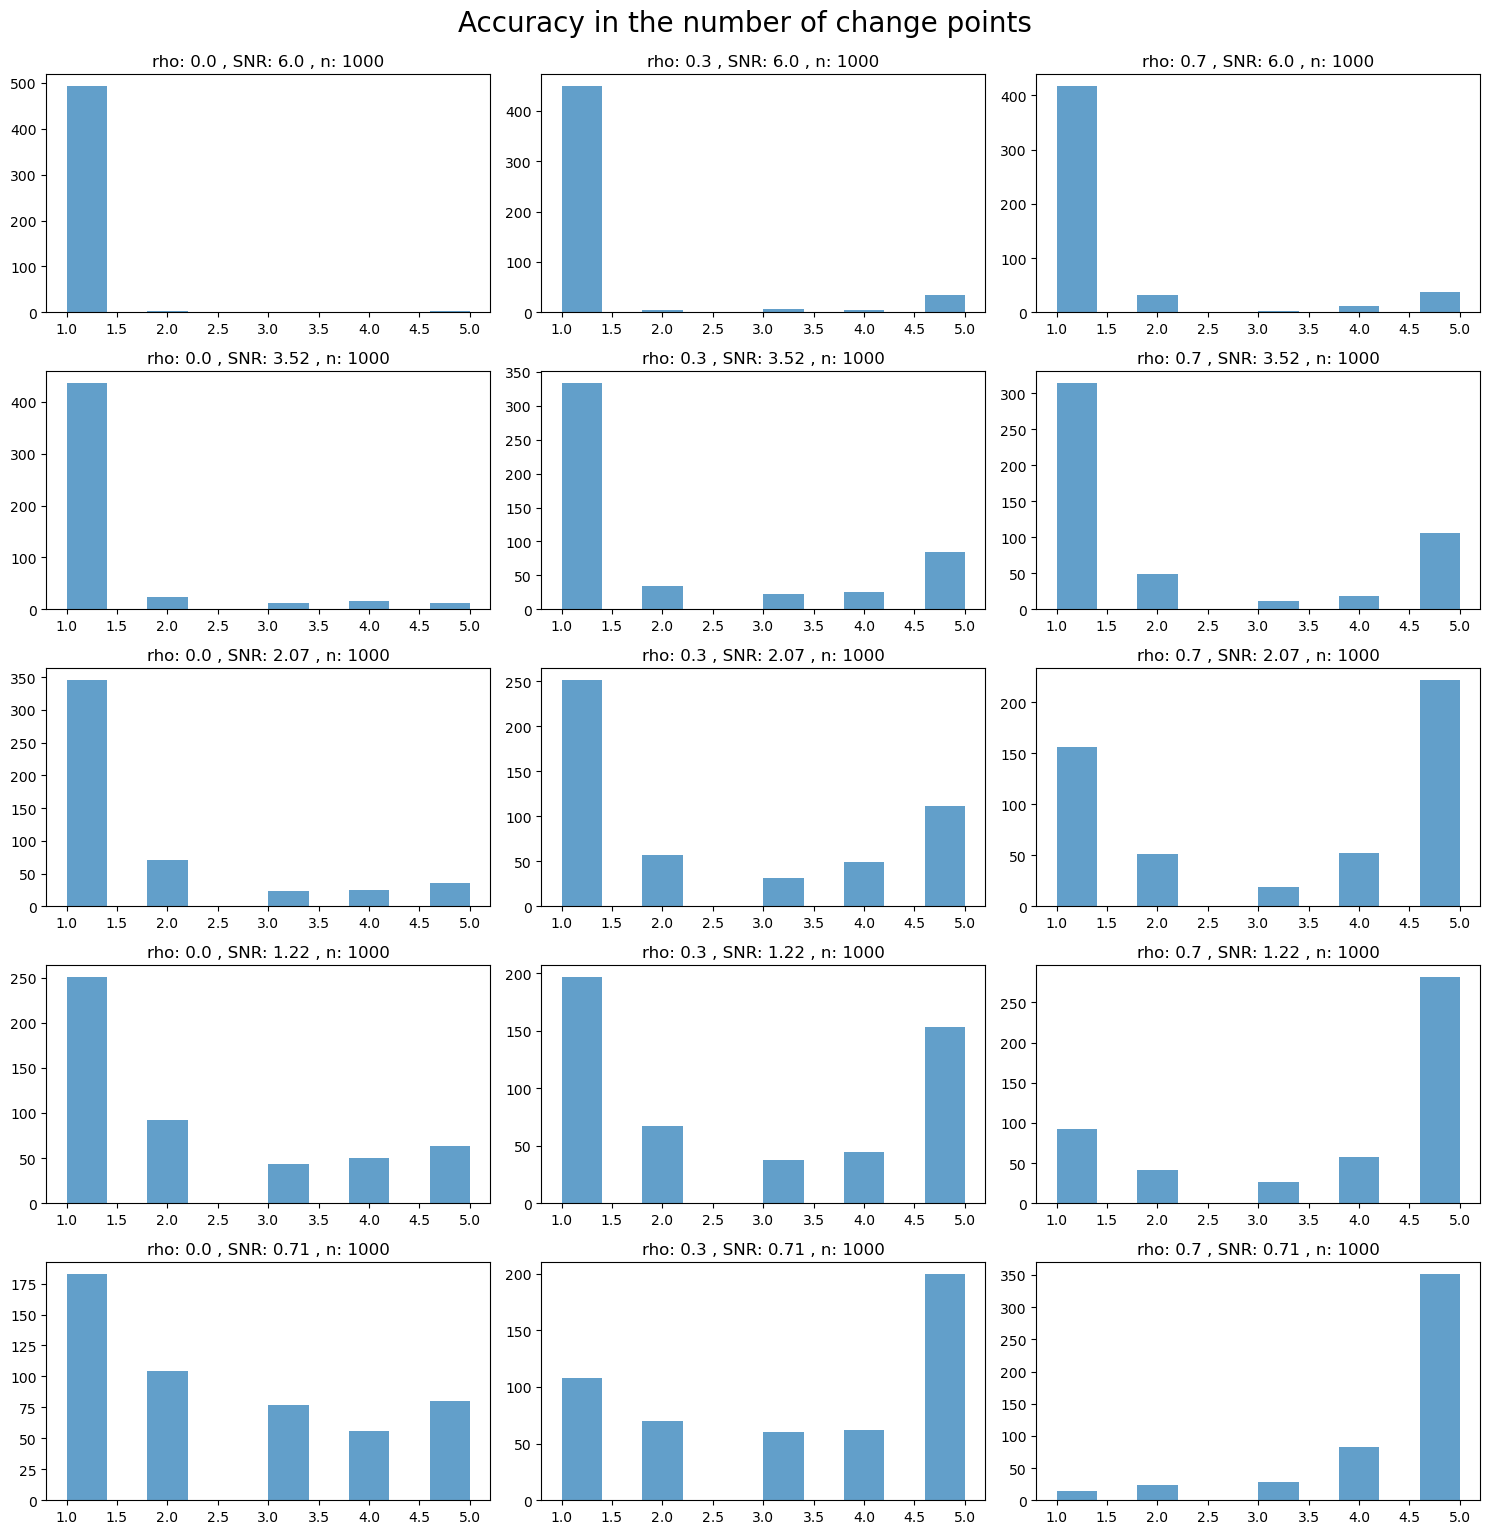

In [7]:
group_list = df["group"].unique()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df.loc[df["group"] == g, "the number of detected change points"], alpha = 0.7)
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Accuracy in the number of change points", fontsize=20).set_y(1.02)
plt.show()

## Optimality Gap

Findings:

- Large optimality gap is associated with the model performance.

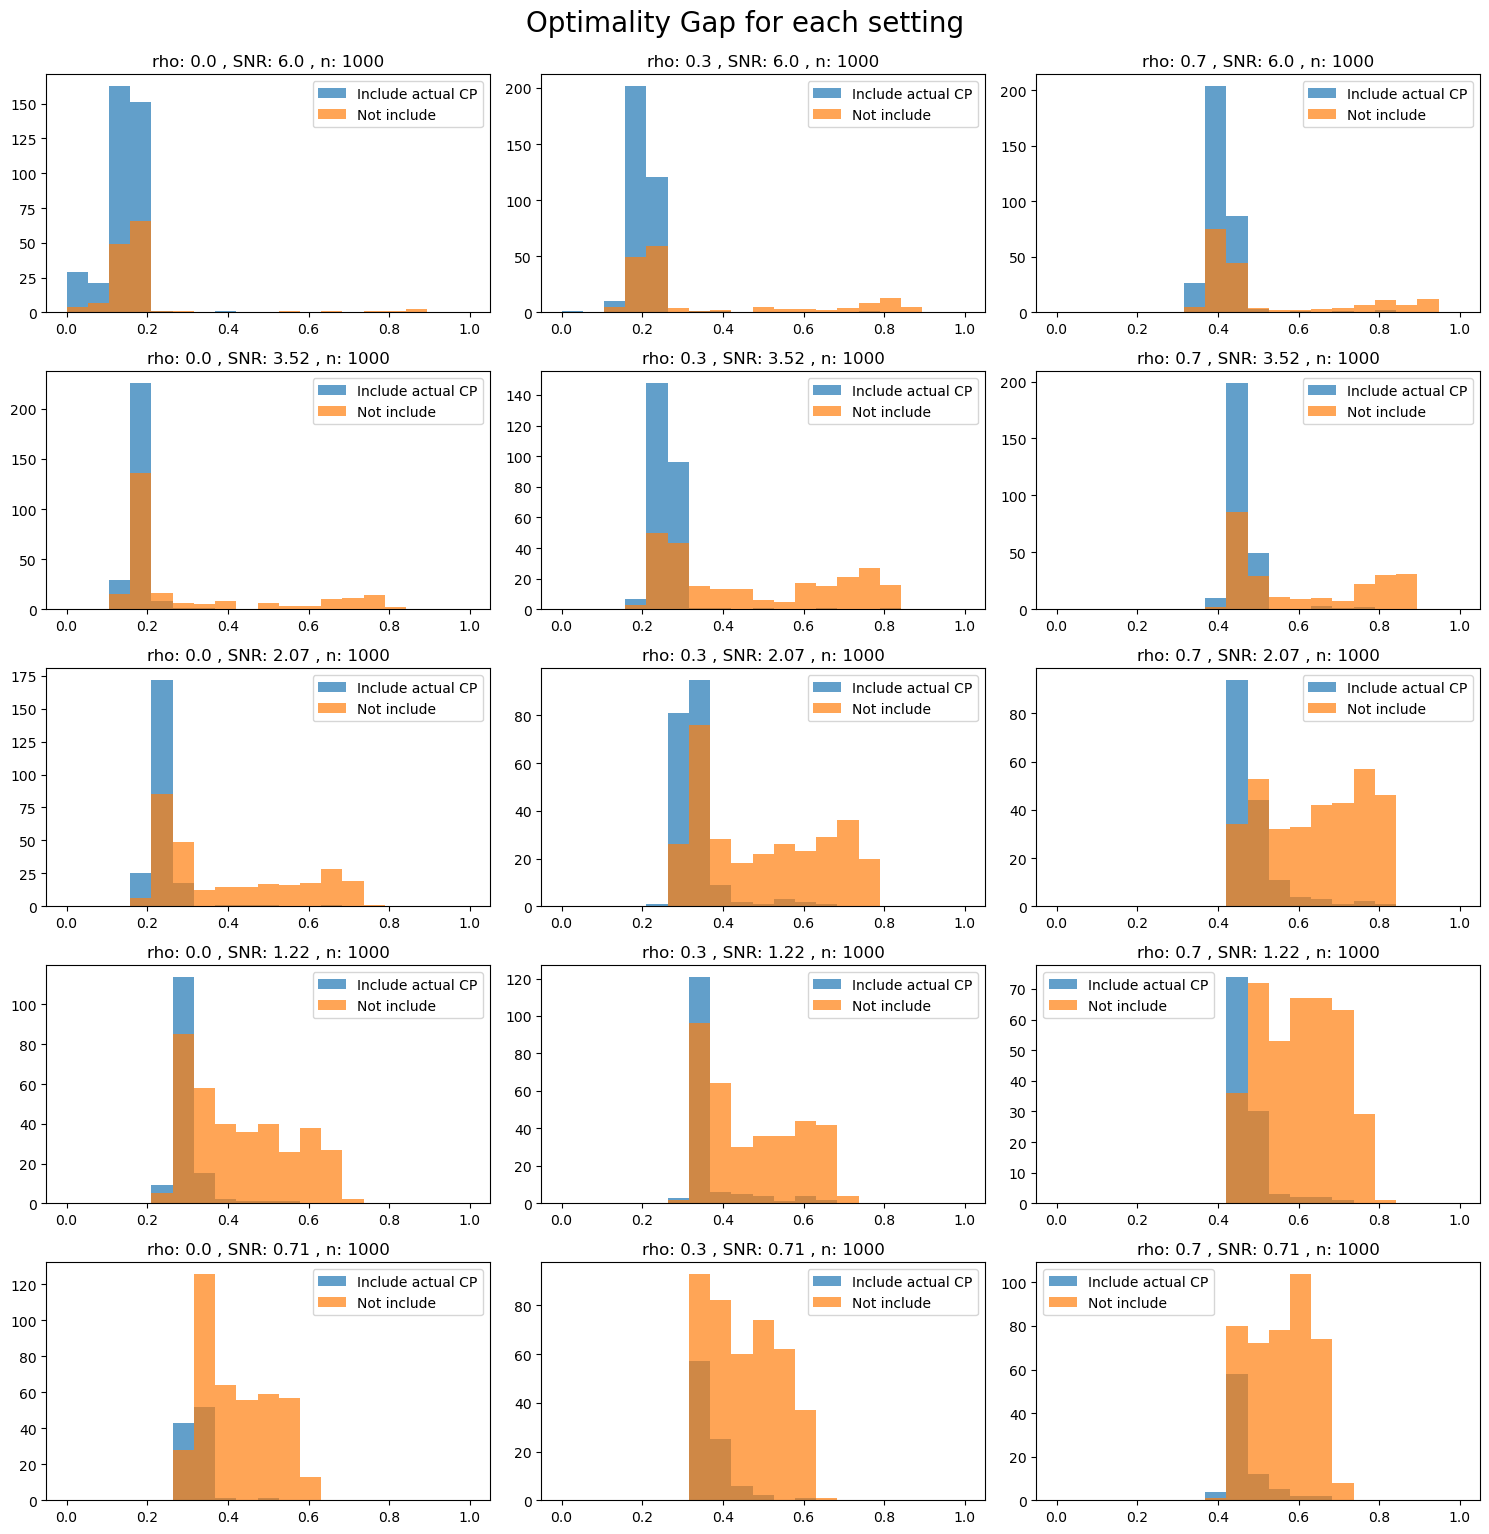

In [8]:
import math

bins = np.linspace(0, 1.0, num=20)

group_list = df["group"].unique()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 1), "Optimality Gap"], bins, label = "Include actual CP", alpha = 0.7)
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 0), "Optimality Gap"], bins, label = "Not include", alpha = 0.7)
    ax.legend()
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Optimality Gap for each setting", fontsize=20).set_y(1.02)
plt.show()

## Time

Findings:

- It seems that there is no clear difference in runtime among settings..

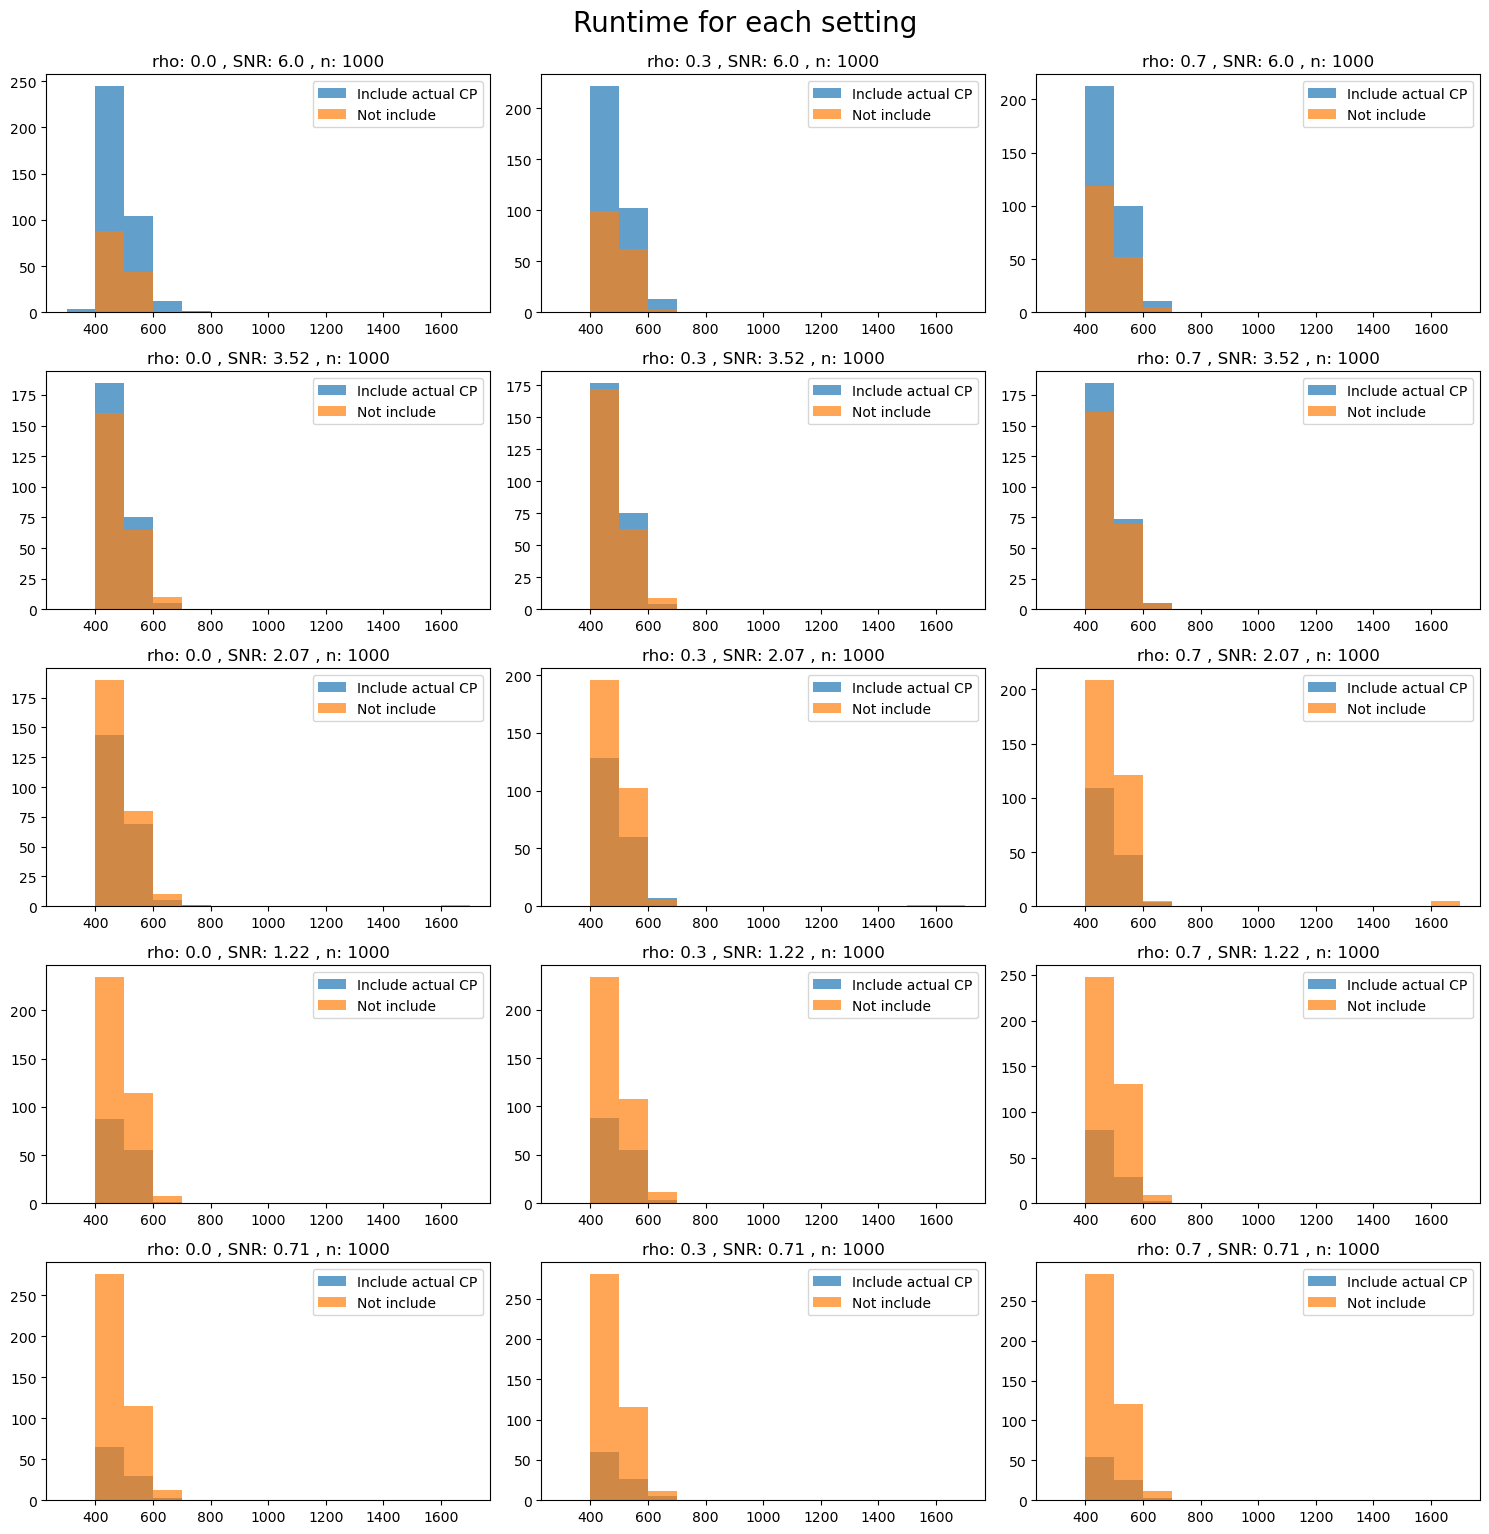

In [9]:
bins = np.linspace(300, 1700, num=15)

group_list = df["group"].unique()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 1), "Time"], bins, label = "Include actual CP", alpha = 0.7)
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 0), "Time"], bins, label = "Not include", alpha = 0.7)
    ax.legend()
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Runtime for each setting", fontsize=20).set_y(1.02)
plt.show()

In [10]:
df.Time.min()

345.2270231246948

In [11]:
df.Time.max()

1626.937005996704

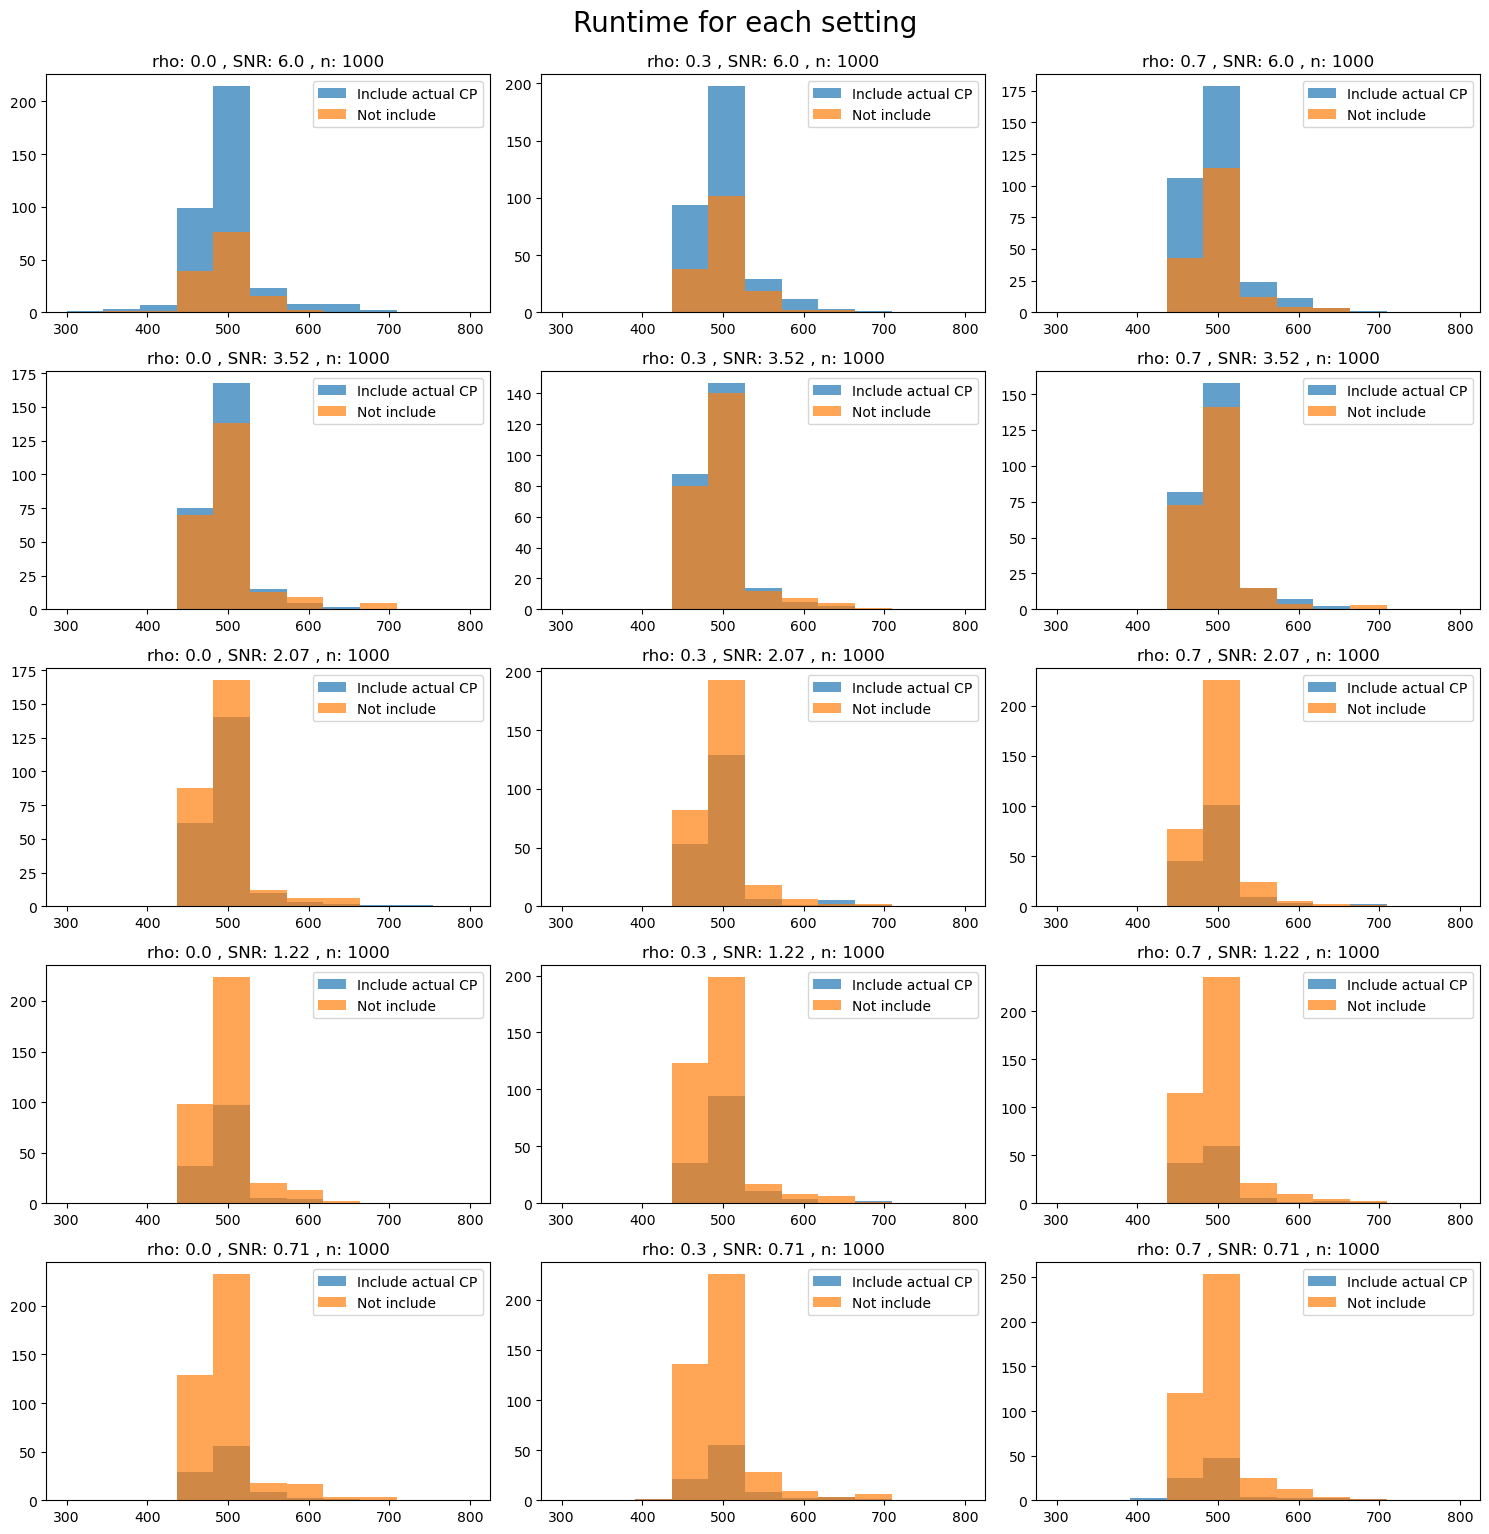

In [12]:
bins = np.linspace(300, 800, num=12)

group_list = df["group"].unique()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 1), "Time"], bins, label = "Include actual CP", alpha = 0.7)
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 0), "Time"], bins, label = "Not include", alpha = 0.7)
    ax.legend()
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Runtime for each setting", fontsize=20).set_y(1.02)
plt.show()

# Benchmarks: Bai and Perron

In [13]:
df_BP= pd.read_csv('results/simulation_five_variate_benchmark_BP_20230408.csv')

# correct_perfect: detect only 499
df_BP['correct_perfect'] = False
df_BP.loc[df_BP['Location of CP'] == "[500, 1000]", 'correct_perfect'] = True

# correct partial: result include 499, it might include other change points.
df_BP['correct_partial'] = df_BP["Location of CP"].str.count("500")

# group name
df_BP["group"] = "rho: " + df_BP["rho"].astype(str) + " , SNR: " + df_BP["SNR"].astype(str) + " , n: " + df_BP["n"].astype(str)
df_BP

,Repitition,Time,rho,SNR,n,The number of CP,Location of CP,correct_perfect,correct_partial,group
0,0,242.878282,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,6,243.477018,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,2,245.595690,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,3,245.595745,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,5,245.595867,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...
7495,498,144.576718,0.3,0.71,1000,1,"[499, 1000]",False,0,"rho: 0.3 , SNR: 0.71 , n: 1000"
7496,499,143.618568,0.3,0.71,1000,1,"[501, 1000]",False,0,"rho: 0.3 , SNR: 0.71 , n: 1000"
7497,498,129.368120,0.7,0.71,1000,1,"[497, 1000]",False,0,"rho: 0.7 , SNR: 0.71 , n: 1000"
7498,497,131.325467,0.7,0.71,1000,1,"[506, 1000]",False,0,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:

- Higher SNR, higher accuracy
- HIgher rho, less accuracy relatively
- The estimated nnumber of CPD seems to be 1 for all sampling.

In [14]:
df_BP_count = df_BP[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
df_BP_count["accuracy_perfect"] = df_BP_count["correct_perfect"]/500
df_BP_count["accuracy_partial"] = df_BP_count["correct_partial"]/500
df_BP_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,196,196,0.392,0.392
1,0.0,1.22,1000,251,251,0.502,0.502
2,0.0,2.07,1000,303,303,0.606,0.606
3,0.0,3.52,1000,340,340,0.680,0.680
4,0.0,6.00,1000,374,374,0.748,0.748
5,0.3,0.71,1000,194,194,0.388,0.388
6,0.3,1.22,1000,239,239,0.478,0.478
7,0.3,2.07,1000,299,299,0.598,0.598
8,0.3,3.52,1000,331,331,0.662,0.662
9,0.3,6.00,1000,372,372,0.744,0.744


In [15]:
df_BP_count.sort_values("accuracy_partial", ascending=False)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,374,374,0.748,0.748
9,0.3,6.00,1000,372,372,0.744,0.744
14,0.7,6.00,1000,372,372,0.744,0.744
3,0.0,3.52,1000,340,340,0.680,0.680
8,0.3,3.52,1000,331,331,0.662,0.662
13,0.7,3.52,1000,329,329,0.658,0.658
2,0.0,2.07,1000,303,303,0.606,0.606
7,0.3,2.07,1000,299,299,0.598,0.598
12,0.7,2.07,1000,285,285,0.570,0.570
11,0.7,1.22,1000,262,262,0.524,0.524


## Estimated number of change points

Findings:

- All model detect 1 change point.

In [16]:
df_BP["The number of CP"].unique()

array([1])

## Optimality Gap: the distibution of the estimated locatio

Findings:

- Smaller SNR, wider range

In [17]:
df_BP['location'] = df_BP["Location of CP"].str[1:4].astype(int)
df_BP.head()

,Repitition,Time,rho,SNR,n,The number of CP,Location of CP,correct_perfect,correct_partial,group,location
0,0,242.878282,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500
1,6,243.477018,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500
2,2,245.595690,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500
3,3,245.595745,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500
4,5,245.595867,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500


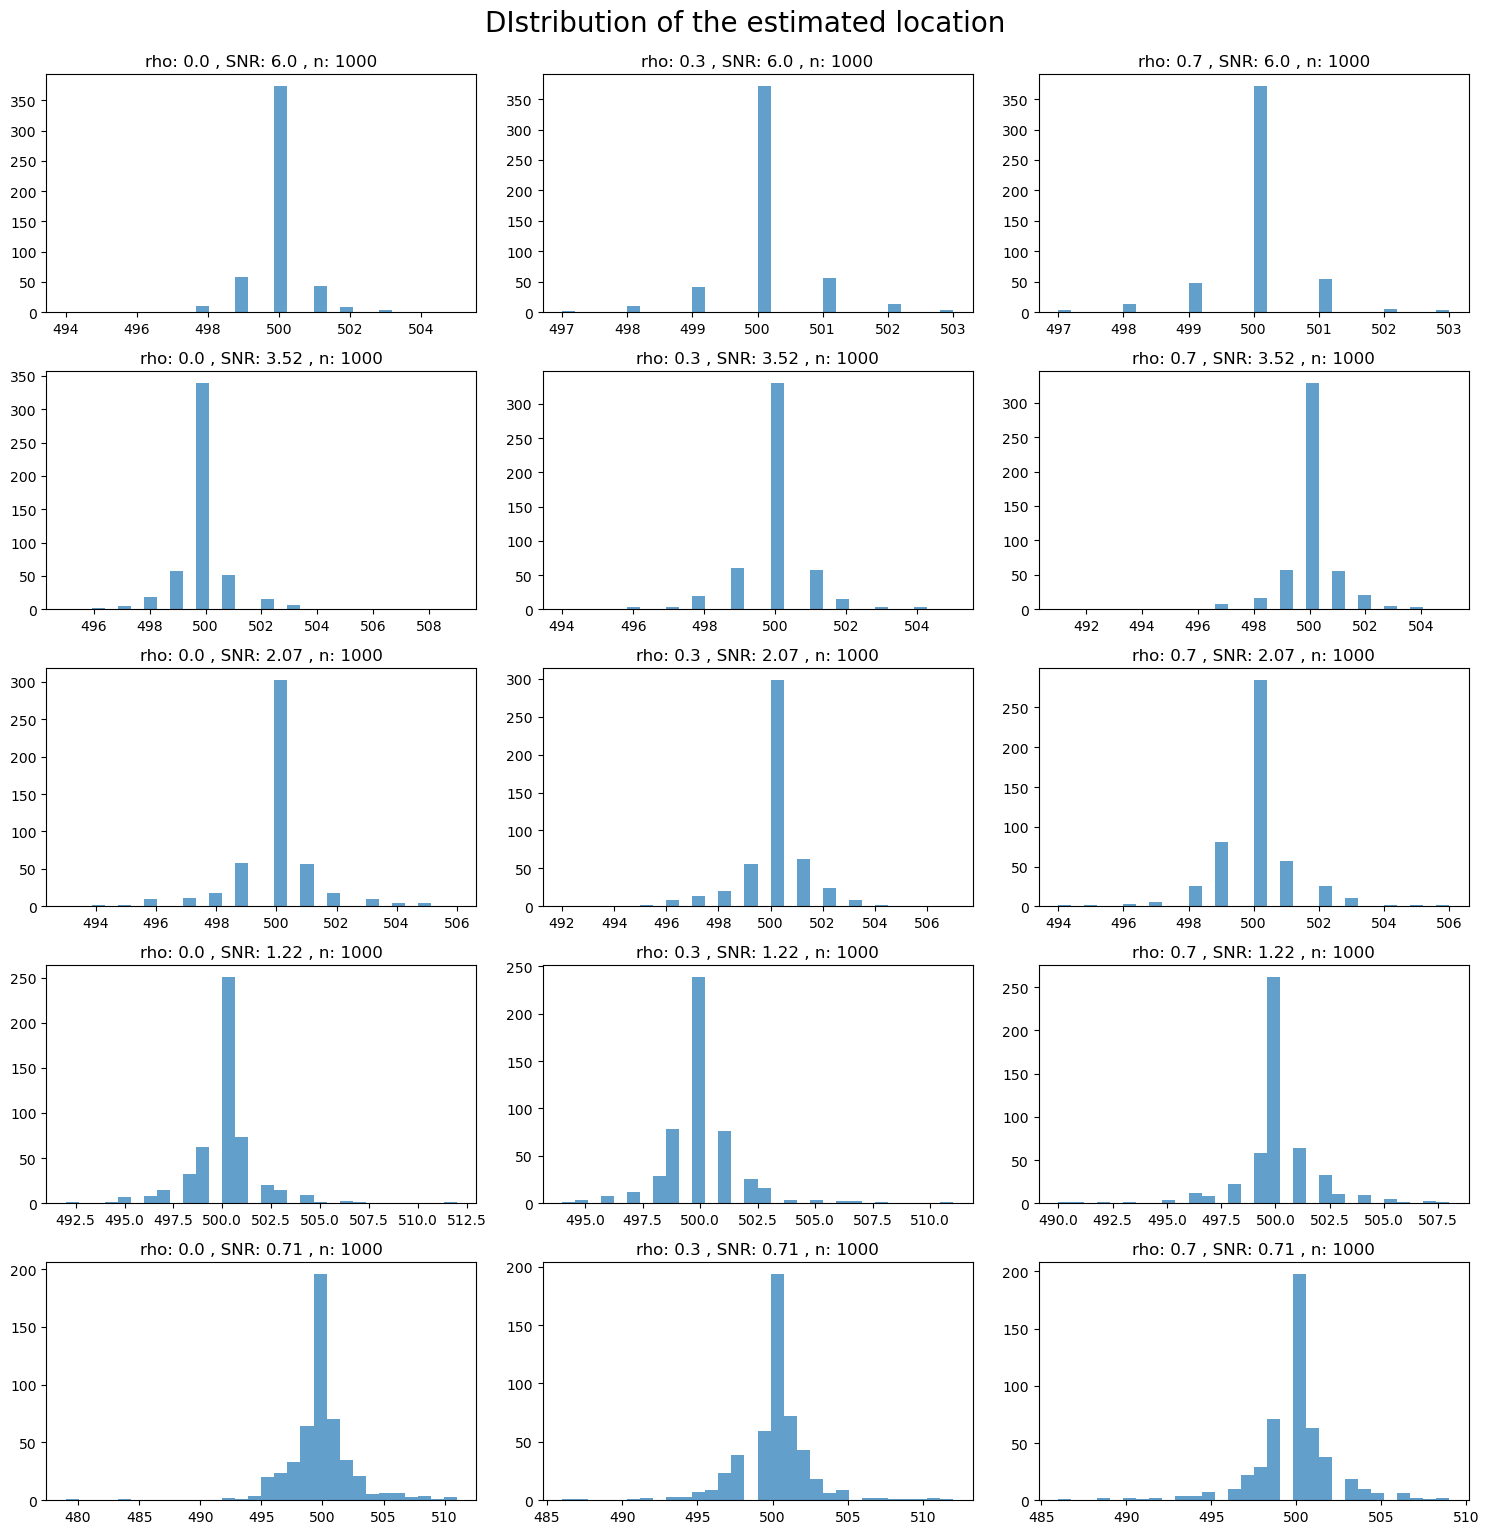

In [18]:
group_list = df_BP["group"].unique()

min_num = df_BP.location.min()
max_num = df_BP.location.max()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df_BP.loc[df_BP["group"] == g, "location"], alpha = 0.7, bins = 30)
    #ax.set_xticks(np.linspace(480, 520, 5))
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("DIstribution of the estimated location", fontsize=20).set_y(1.02)
plt.show()

# Comparison

In [24]:
df_BP_count = df_BP_count.rename(columns = {"accuracy_perfect" : "BP_accuracy_perfect","accuracy_partial" : "BP_accuracy_partial" })
df_BP_count

,rho,SNR,n,correct_perfect,correct_partial,BP_accuracy_perfect,BP_accuracy_partial
0,0.0,0.71,1000,196,196,0.392,0.392
1,0.0,1.22,1000,251,251,0.502,0.502
2,0.0,2.07,1000,303,303,0.606,0.606
3,0.0,3.52,1000,340,340,0.680,0.680
4,0.0,6.00,1000,374,374,0.748,0.748
5,0.3,0.71,1000,194,194,0.388,0.388
6,0.3,1.22,1000,239,239,0.478,0.478
7,0.3,2.07,1000,299,299,0.598,0.598
8,0.3,3.52,1000,331,331,0.662,0.662
9,0.3,6.00,1000,372,372,0.744,0.744


In [25]:
df_count = df_count.rename(columns = {"accuracy_perfect" : "Our_accuracy_perfect","accuracy_partial" : "Our_accuracy_partial" })
df_count

,rho,SNR,n,correct_perfect,correct_partial,Our_accuracy_perfect,Our_accuracy_partial
0,0.0,0.71,1000,81,97,0.162,0.194
1,0.0,1.22,1000,121,143,0.242,0.286
2,0.0,2.07,1000,206,219,0.412,0.438
3,0.0,3.52,1000,261,265,0.522,0.530
4,0.0,6.00,1000,364,366,0.728,0.732
5,0.3,0.71,1000,51,91,0.102,0.182
6,0.3,1.22,1000,112,146,0.224,0.292
7,0.3,2.07,1000,164,195,0.328,0.390
8,0.3,3.52,1000,246,256,0.492,0.512
9,0.3,6.00,1000,334,337,0.668,0.674


In [28]:
df_summary = df_count.drop(["correct_partial", "correct_perfect"], axis = 1).merge(df_BP_count.drop(["correct_partial", "correct_perfect"], axis = 1), how = "left")
df_summary

,rho,SNR,n,Our_accuracy_perfect,Our_accuracy_partial,BP_accuracy_perfect,BP_accuracy_partial
0,0.0,0.71,1000,0.162,0.194,0.392,0.392
1,0.0,1.22,1000,0.242,0.286,0.502,0.502
2,0.0,2.07,1000,0.412,0.438,0.606,0.606
3,0.0,3.52,1000,0.522,0.530,0.680,0.680
4,0.0,6.00,1000,0.728,0.732,0.748,0.748
5,0.3,0.71,1000,0.102,0.182,0.388,0.388
6,0.3,1.22,1000,0.224,0.292,0.478,0.478
7,0.3,2.07,1000,0.328,0.390,0.598,0.598
8,0.3,3.52,1000,0.492,0.512,0.662,0.662
9,0.3,6.00,1000,0.668,0.674,0.744,0.744


In [42]:
df_plot_perfect = df_summary.drop(["Our_accuracy_partial", "BP_accuracy_partial"], axis = 1).rename(columns = {"Our_accuracy_perfect":"Proposed model", "BP_accuracy_perfect": "Bai and Perron"}).melt(id_vars = ["rho", "SNR", "n"])
df_plot_perfect["group"] = "rho: " + df_plot_perfect["rho"].astype(str) + " , SNR: " + df_plot_perfect["SNR"].astype(str) + " , n: " + df_plot_perfect["n"].astype(str)

df_plot_perfect

,rho,SNR,n,variable,value,group
0,0.0,0.71,1000,Proposed model,0.162,"rho: 0.0 , SNR: 0.71 , n: 1000"
1,0.0,1.22,1000,Proposed model,0.242,"rho: 0.0 , SNR: 1.22 , n: 1000"
2,0.0,2.07,1000,Proposed model,0.412,"rho: 0.0 , SNR: 2.07 , n: 1000"
3,0.0,3.52,1000,Proposed model,0.522,"rho: 0.0 , SNR: 3.52 , n: 1000"
4,0.0,6.00,1000,Proposed model,0.728,"rho: 0.0 , SNR: 6.0 , n: 1000"
5,0.3,0.71,1000,Proposed model,0.102,"rho: 0.3 , SNR: 0.71 , n: 1000"
6,0.3,1.22,1000,Proposed model,0.224,"rho: 0.3 , SNR: 1.22 , n: 1000"
7,0.3,2.07,1000,Proposed model,0.328,"rho: 0.3 , SNR: 2.07 , n: 1000"
8,0.3,3.52,1000,Proposed model,0.492,"rho: 0.3 , SNR: 3.52 , n: 1000"
9,0.3,6.00,1000,Proposed model,0.668,"rho: 0.3 , SNR: 6.0 , n: 1000"


<AxesSubplot:xlabel='group', ylabel='value'>

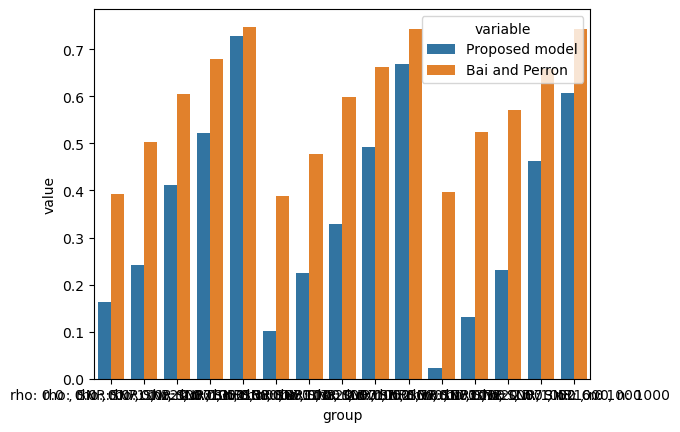

In [43]:
import seaborn as sns
sns.barplot(data = df_plot_perfect, x = "group", y = "value", hue = "variable")

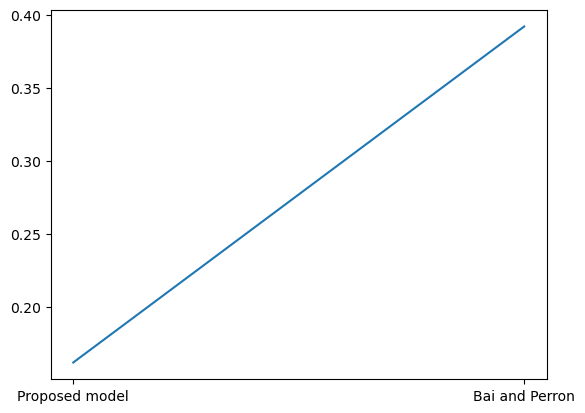

In [46]:
plt.plot(df_plot_perfect.loc[df_plot_perfect["group"] == "rho: 0.0 , SNR: 0.71 , n: 1000", "variable"],
         df_plot_perfect.loc[df_plot_perfect["group"] == "rho: 0.0 , SNR: 0.71 , n: 1000", "value"])

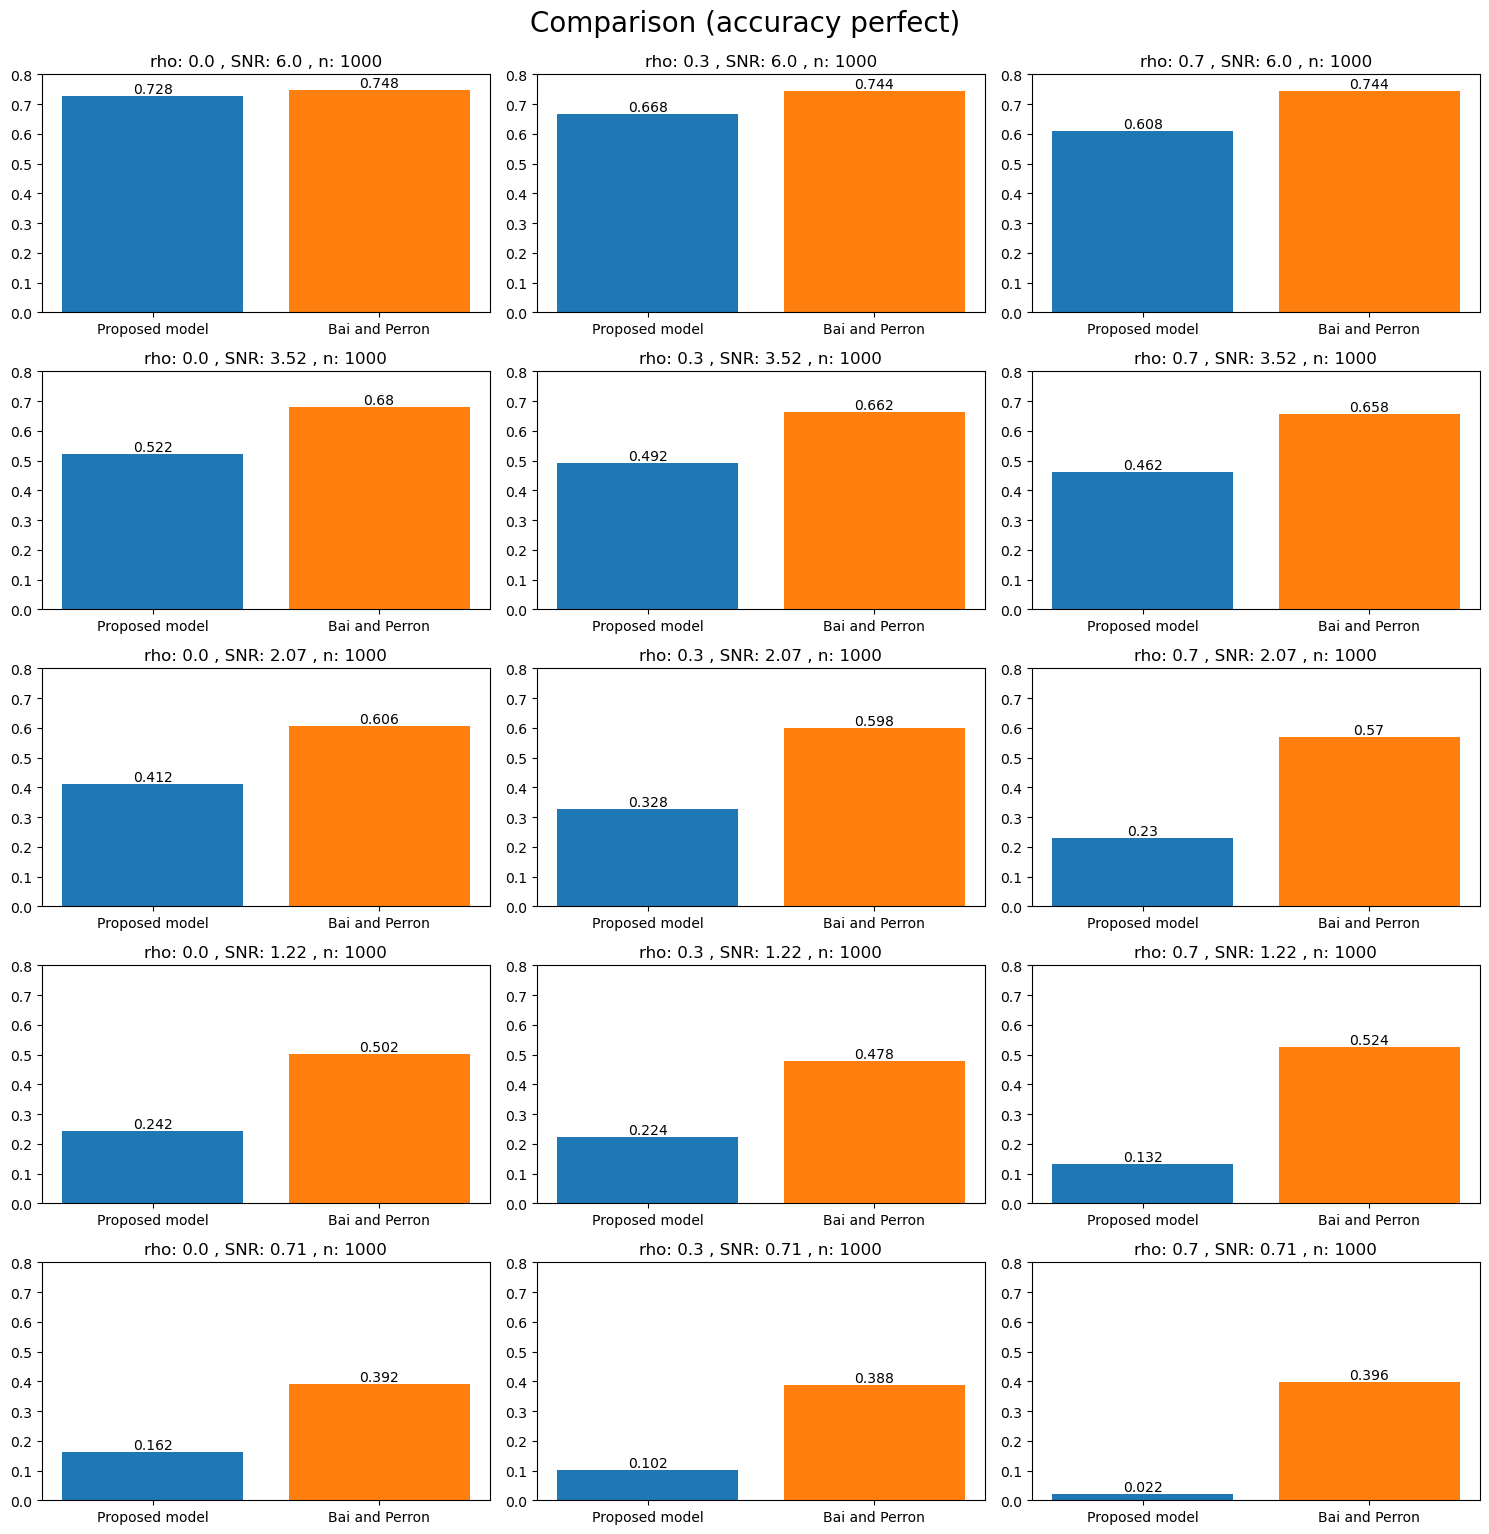

In [65]:
group_list = df_BP["group"].unique()



fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    p = ax.bar(df_plot_perfect.loc[df_plot_perfect["group"] == g, "variable"],
         df_plot_perfect.loc[df_plot_perfect["group"] == g, "value"], color = ["tab:blue", "tab:orange"])
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    ax.bar_label(p, label_type = "edge")
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Comparison (accuracy perfect)", fontsize=20).set_y(1.02)
plt.show()

In [56]:
df_plot_partial = df_summary.drop(["Our_accuracy_perfect", "BP_accuracy_perfect"], axis = 1).rename(columns = {"Our_accuracy_partial":"Proposed model", "BP_accuracy_partial": "Bai and Perron"}).melt(id_vars = ["rho", "SNR", "n"])
df_plot_partial["group"] = "rho: " + df_plot_partial["rho"].astype(str) + " , SNR: " + df_plot_partial["SNR"].astype(str) + " , n: " + df_plot_partial["n"].astype(str)

df_plot_partial

,rho,SNR,n,variable,value,group
0,0.0,0.71,1000,Proposed model,0.194,"rho: 0.0 , SNR: 0.71 , n: 1000"
1,0.0,1.22,1000,Proposed model,0.286,"rho: 0.0 , SNR: 1.22 , n: 1000"
2,0.0,2.07,1000,Proposed model,0.438,"rho: 0.0 , SNR: 2.07 , n: 1000"
3,0.0,3.52,1000,Proposed model,0.530,"rho: 0.0 , SNR: 3.52 , n: 1000"
4,0.0,6.00,1000,Proposed model,0.732,"rho: 0.0 , SNR: 6.0 , n: 1000"
5,0.3,0.71,1000,Proposed model,0.182,"rho: 0.3 , SNR: 0.71 , n: 1000"
6,0.3,1.22,1000,Proposed model,0.292,"rho: 0.3 , SNR: 1.22 , n: 1000"
7,0.3,2.07,1000,Proposed model,0.390,"rho: 0.3 , SNR: 2.07 , n: 1000"
8,0.3,3.52,1000,Proposed model,0.512,"rho: 0.3 , SNR: 3.52 , n: 1000"
9,0.3,6.00,1000,Proposed model,0.674,"rho: 0.3 , SNR: 6.0 , n: 1000"


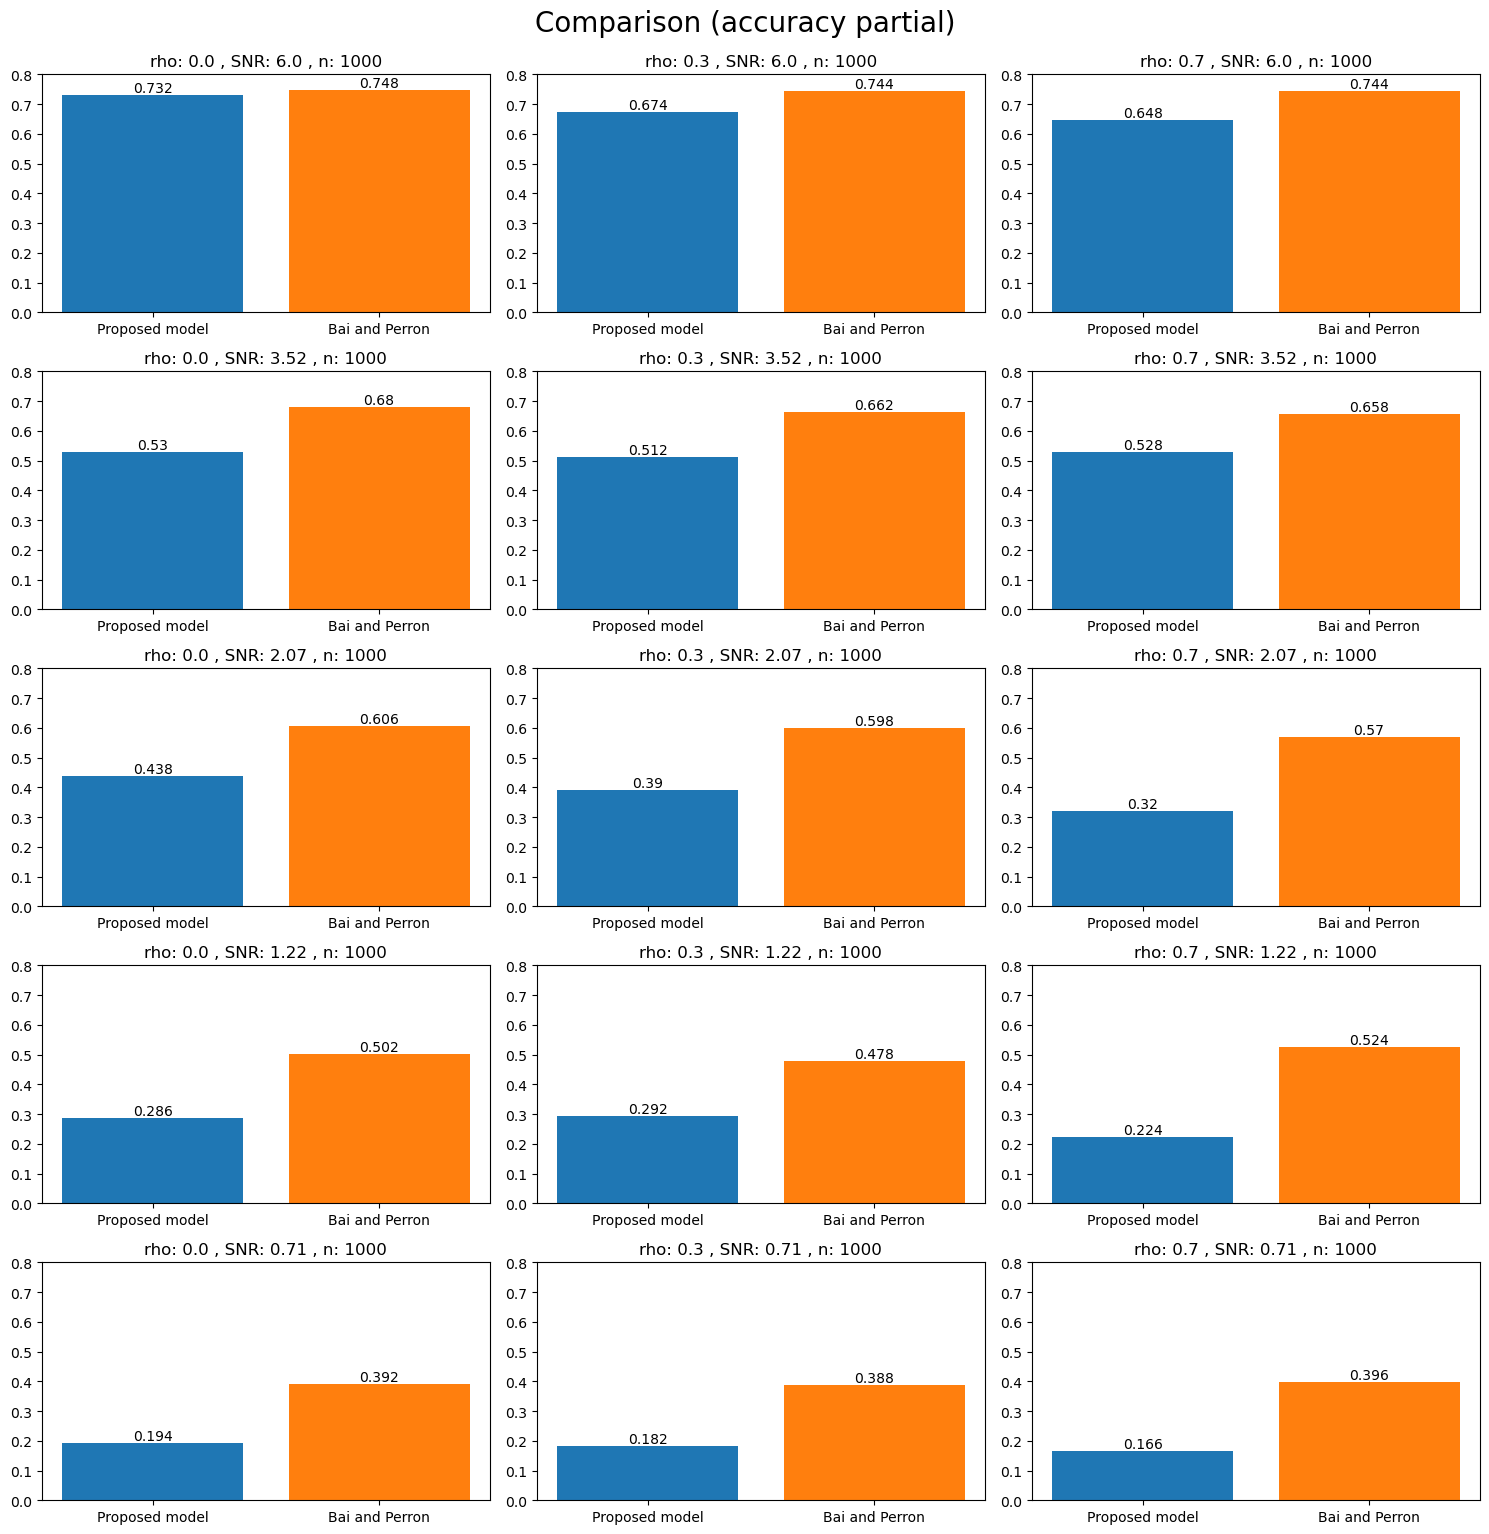

In [66]:
group_list = df_BP["group"].unique()

#min_num = df_BP.location.min()
#max_num = df_BP.location.max()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    p = ax.bar(df_plot_partial.loc[df_plot_perfect["group"] == g, "variable"],
         df_plot_partial.loc[df_plot_perfect["group"] == g, "value"], color = ["tab:blue", "tab:orange"])
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    ax.bar_label(p, label_type = "edge")
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Comparison (accuracy partial)", fontsize=20).set_y(1.02)
plt.show()